# Model Evaluation and Improvement

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
warnings.filterwarnings('ignore')

### train_test_split

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


### Cross-Validation

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [5]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


Using the mean cross-validation we can conclude that we expect the model to be
around 96% accurate on average

The high variance in cv scores could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

### Benefits of Cross-Validation
* the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high
* it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data
* we use our data more effectively

The main disadvantage of cross-validation is increased computational cost

### Stratified k-Fold Cross-Validation and Other Strategies

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


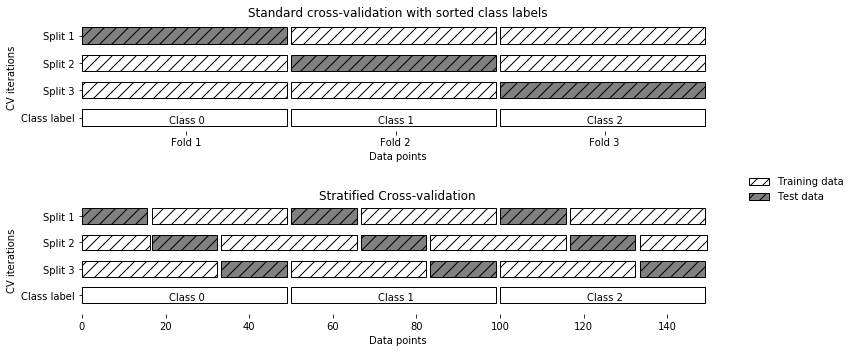

In [7]:
mglearn.plots.plot_stratified_cross_validation()

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance.

If we
want to use the standard k-fold cross-validation on a classification dataset to reproduce
someone else’s results. To do this, we first have to import the KFold splitter class
from the model_selection module and instantiate it with the number of folds we
want to use:

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [9]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


If we shuffle the data, we
also need to fix the random_state to get a reproducible shuffling

In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


### Leave-one-out cross-validation

In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iterations: ', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### Shuffle-split cross-validation

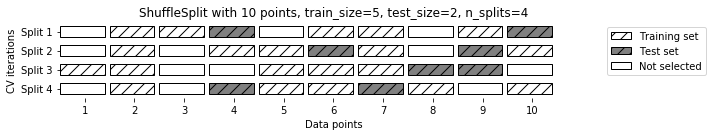

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-Validation scores:\n{}'.format(scores))

Cross-Validation scores:
[0.97333333 0.90666667 0.89333333 0.93333333 0.93333333 0.89333333
 0.90666667 0.88       0.85333333 0.90666667]


Shuffle-split cross-validation allows for control over the number of iterations independently
of the training and test sizes, which can sometimes be helpful. It also allows
for using only part of the data in each iteration, by providing train_size and
test_size settings that don’t add up to one. Subsampling the data in this way can be
useful for experimenting with large datasets

There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleS
plit, which can provide more reliable results for classification tasks

### Cross-validation with groups

GroupKFold, which takes an array of groups as argument, which indicates
groups in the data that should not be split when creating the training and test
sets, and should not be confused with the class label

In [14]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(scores)

[0.75       0.8        0.66666667]


There are more splitting strategies for cross-validation in scikit-learn, which allow
for an even greater variety of use cases (you can find these in the scikit-learn user
guide). However, the standard KFold, StratifiedKFold, and GroupKFold are by far
the most commonly used ones.

### Grid Search

In [15]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is

This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model

Any choices made
based on the test set accuracy “leak” information from the test set into the model

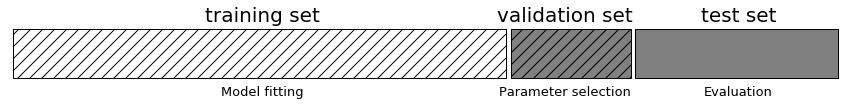

In [16]:
mglearn.plots.plot_threefold_split()

In [17]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


Therefore, it is important to keep a separate test set, which is only used for the final
evaluation

It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. Strictly speaking, evaluating
more than one model on the test set and choosing the better of the two will result
in an overly optimistic estimate of how accurate the model is

### Grid Search with Cross-Validation

The method above works, but it is quite sensitive to how
exactly the data is split.

For a better estimate of the generalization performance, instead of
using a single split into a training and a validation set, we can use cross-validation to
evaluate the performance of each parameter combination

In [18]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

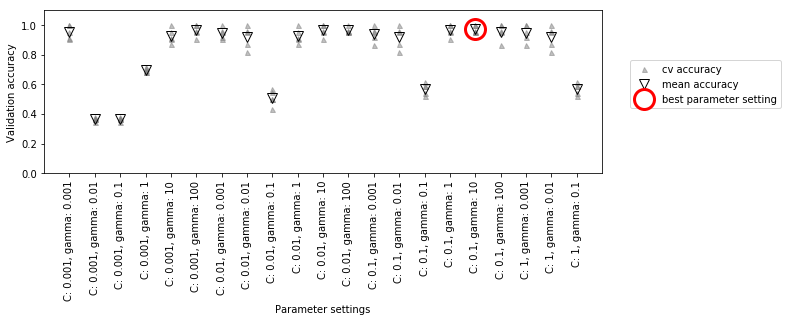

In [19]:
mglearn.plots.plot_cross_val_selection()

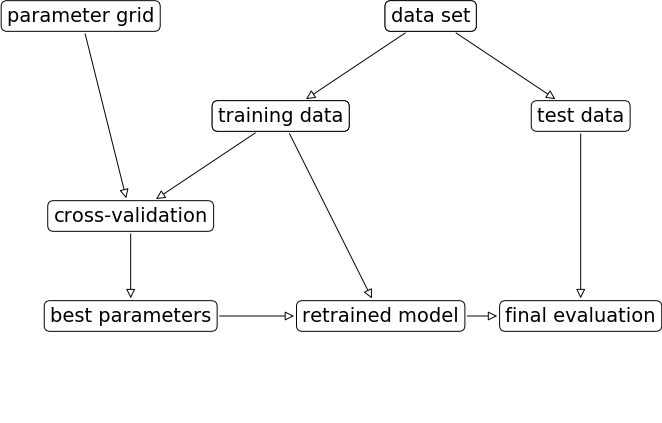

In [20]:
mglearn.plots.plot_grid_search_overview()

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Test set score: 0.97


Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance

### Analyzing the result of cross-validation

In [23]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001199,0.000400,0.000399,0.000489,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.001201,0.000402,0.000199,0.000399,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000999,0.000632,0.000399,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.001800,0.000979,0.000399,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000799,0.000400,0.000400,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


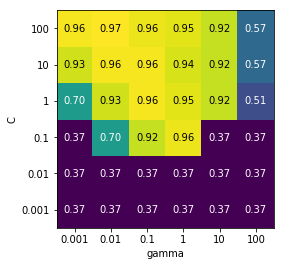

In [24]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

It’s important to note that the ranges for
the parameters are large enough: the optimum values for each parameter are not on
the edges of the plot

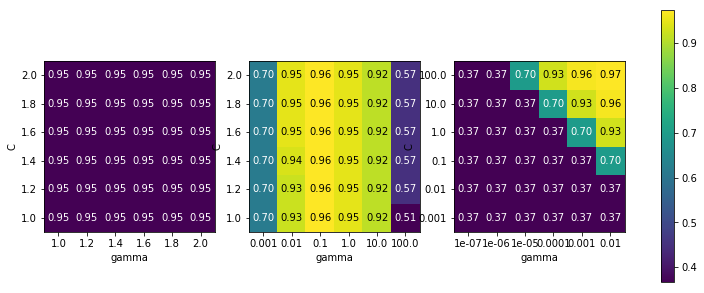

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
    param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                                         xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

However, if no change in accuracy is visible over the different parameter
settings, it could also be that a parameter is just not important at all. It is usually good
to try very extreme values first, to see if there are any changes in the accuracy as a
result of changing a parameter

Tuning the parameter grid based on the cross-validation scores is perfectly fine, and a
good way to explore the importance of different parameters. However, you should
not test different parameter ranges on the final test set—as we discussed earlier, evaluation of the test set should happen only once we know exactly what model we want
to use.

Searching over all possible combinations of C, gamma, and kernel wouldn’t
make sense: if kernel='linear', gamma is not used, and trying different values for
gamma would be a waste of time. To deal with these kinds of “conditional” parameters,
GridSearchCV allows the param_grid to be a list of dictionaries

In [26]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [27]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


Similarly to cross_val_score, GridSearchCV uses stratified k-fold cross-validation
by default for classification, and k-fold cross-validation for regression. However, you
can also pass any cross-validation splitter. In particular, to get
only a single split into a training and a validation set, you can use ShuffleSplit or
StratifiedShuffleSplit with n_iter=1. This might be helpful for very large datasets,
or very slow models.

### Nested cross-validation

Nested crossvalidation
is rarely used when looking for a predictive model to apply to future data.
However, it can be useful for evaluating how well a given model works on a particular
dataset.

In [28]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


The result of our nested cross-validation can be summarized as “SVC can achieve 98%
mean cross-validation accuracy on the iris dataset”—nothing more and nothing
less.

### Parallelizing cross-validation and grid search

You should be aware that scikit-learn does not allow nesting of parallel operations.
So, if you are using the n_jobs option on your model (for example, a random forest),
you cannot use it in GridSearchCV to search over this model. If your dataset and
model are very large, it might be that using many cores uses up too much memory,
and you should monitor your memory usage when building large models in parallel.

## Evaluation Metrics and Scoring

When selecting a metric, you should always have the end goal of the machine learning
application in mind.

When choosing a
model or adjusting parameters, you should pick the model or parameter values that
have the most positive influence on the business metric

### Metrics for Binary Classification

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [31]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


### Confusion matrices

In [32]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


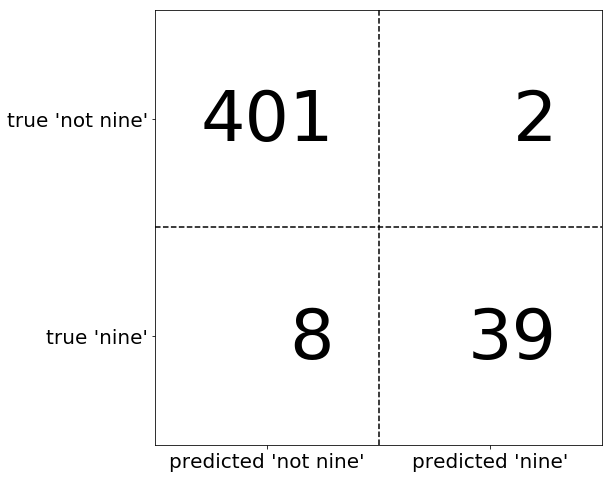

In [33]:
mglearn.plots.plot_confusion_matrix_illustration()

In [34]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[361  42]
 [ 40   7]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


There are several ways to summarize
the information in the confusion matrix

* Accuracy: (TP + TN) / (TP + TN + FP + FN)
* Precison: TP / (TP + FP) -- used when the goal is to limit false positives
* Recall: TP / (TP + FN) -- used when the goal is to identify all positive samples(avoid false negitives)
* f1-score: 2 * precision * recall / (precision + recall) -- a better measure than accuracy on imbalanced binary classification datasets

while precision and recall are very important measures, looking at only one of
them will not provide you with the full picture. One way to summarize them is the
f-score or f-measure, which is with the harmonic mean of precision and recall

In [35]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.15
f1 score tree: 0.55
f1 score logistic regression: 0.89


However, the f-score seems to capture our intuition
of what makes a good model much better than accuracy did. A disadvantage of the
f-score, however, is that it is harder to interpret and explain than accuracy

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [38]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.90      0.90       403
        nine       0.14      0.15      0.15        47

   micro avg       0.82      0.82      0.82       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.82      0.82       450



In [39]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



Looking at all the numbers together paints a pretty accurate picture, though, and we
can clearly see the superiority of the logistic regression model

### Taking uncertainty into account

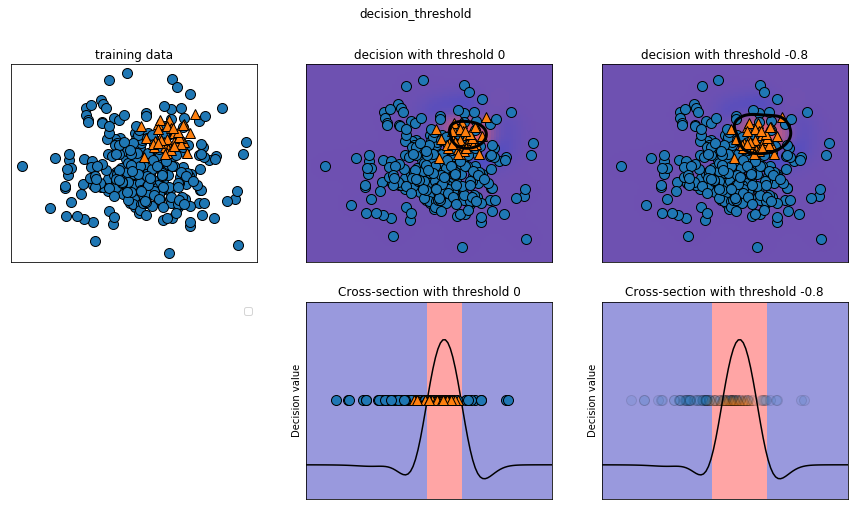

In [40]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()

In [41]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [42]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [43]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



As expected, the recall of class 1 went up, and the precision went down. We are now
classifying a larger region of space as class 1

If you value precision over recall or the other way around, or your data is
heavily imbalanced, changing the decision threshold is the easiest way to obtain better
results.

### Precision-recall curves and ROC curves

In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

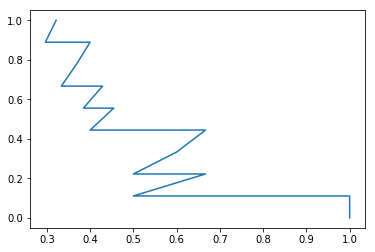

In [46]:
plt.plot(precision, recall)

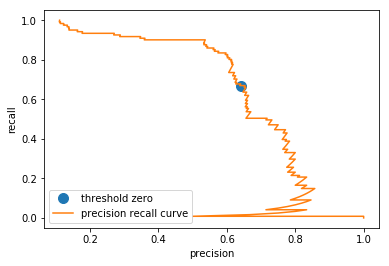

In [47]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
zero = np.argmin(np.abs(thresholds))
plt.plot(precision[zero], recall[zero], 'o', markersize=10, label='threshold zero')
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc=3)
plt.show()

The closer a curve stays to the upper-right corner, the better the classifier

Different classifiers can work well in different parts of the curve

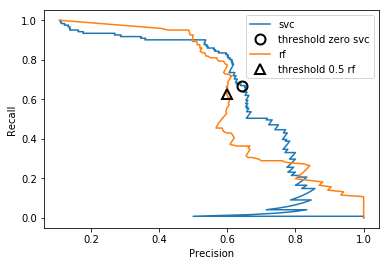

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[zero], recall[zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

From the comparison plot we can see that the random forest performs better at the
extremes, for very high recall or very high precision requirements. Around the middle
(approximately precision=0.7), the SVM performs better. If we only looked at the
f1-score to compare overall performance, we would have missed these subtleties.

In [49]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [50]:
from sklearn.metrics import average_precision_score

In [51]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


### Receiver operating characteristics (ROC) and AUC 

ROC curve -- FPR(x)-TPR(recall)(y)

In [52]:
from sklearn.metrics import roc_curve

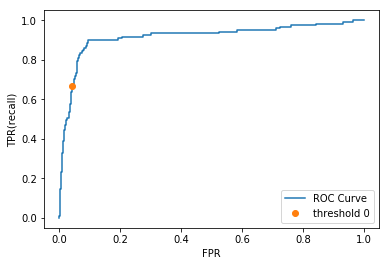

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', label='threshold 0')
plt.legend()
plt.show()

For the ROC curve, the ideal curve is close to the top left

#### Again, be aware that choosing a threshold should not be done on the test set, but on a separate validation set.

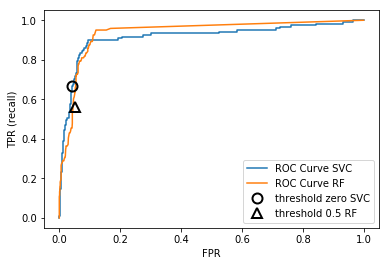

In [54]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


Recall that because average precision
is the area under a curve that goes from 0 to 1, average precision always returns
a value between 0 (worst) and 1 (best). Predicting randomly always produces an AUC
of 0.5, no matter how imbalanced the classes in a dataset are.

This makes AUC a
much better metric for imbalanced classification problems than accuracy.

AUC of 1.0 means that
all positive points are ranked higher than all negative points according to the decision
function. In other words, with the right threshold, this model can classify the data
perfectly

Keep in mind that AUC does not make use of the default threshold,
though, so adjusting the decision threshold might be necessary to obtain useful classification
results from a model with a high AUC.

### Metrics for Multiclass Classification

Apart from
accuracy, common tools are the confusion matrix and the classification report we saw
in the binary case in the previous section.

In [56]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


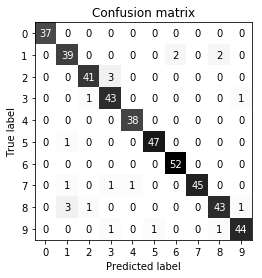

In [57]:
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



* "macro" averaging computes the unweighted per-class f-scores. This gives equal weight to all classes, no matter what their size is.
* "weighted" averaging computes the mean of the per-class f-scores, weighted by their support. This is what is reported in the classification report.
* "micro" averaging computes the total number of false positives, false negatives, and true positives over all classes, and then computes precision, recall, and f-score using these counts.

If you care about each sample equally much, it is recommended to use the "micro"
average f1-score; if you care about each class equally much, it is recommended to use
the "macro" average f1-score:

In [59]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


## Regression Metrics

In most applications we’ve seen, using the default R2 used in the score
method of all regressors is enough

Sometimes business decisions are made on the
basis of mean squared error or mean absolute error, which might give incentive to
tune models using these metrics.

In general, though, we have found R2 to be a more
intuitive metric to evaluate regression models

## Using Evaluation Metrics in Model Selection

In [61]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]
AUC scoring: [0.99372294 0.98957947 0.99594929]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [64]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


Using AUC found a better parameter setting in
terms of AUC and even in terms of accuracy.

In [65]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


## Summary

If we use the test
set or cross-validation to select a model or select model parameters, we “use up” the
test data, and using the same data to evaluate how well our model will do in the future
will lead to overly optimistic estimates.

It is rarely the case that the end goal of a
machine learning task is building a model with a high accuracy